In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

# Load the dataset in streaming mode
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Books", split="full", streaming=True, trust_remote_code=True)
# Extract 10000 samples out 3.5 million samples using take() and convert to a regular Dataset
data_list = list(dataset.take(50000))
print(len(data_list))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

50000


In [ ]:


df = pd.DataFrame(data_list)
# Print some info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             50000 non-null  float64
 1   title              50000 non-null  object 
 2   text               50000 non-null  object 
 3   images             50000 non-null  object 
 4   asin               50000 non-null  object 
 5   parent_asin        50000 non-null  object 
 6   user_id            50000 non-null  object 
 7   timestamp          50000 non-null  int64  
 8   helpful_vote       50000 non-null  int64  
 9   verified_purchase  50000 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 3.5+ MB


In [ ]:
!pip install pandas requests onedrivedownloader

In [ ]:
!pip install onedrivedownloader --upgrade --force-reinstall #force reinstall can be optional if desired
import requests
import io
import pandas as pd
# Import the download function instead of OneDriveDownloader class
from onedrivedownloader import download

# Replace with your direct OneDrive link for the TSV file
onedrive_link = "https://indianinstituteofscience-my.sharepoint.com/:u:/g/personal/rishavg_iisc_ac_in/Ecr2JHgh-2VBg3bYhcqFQKYBcpNLNsLEPfGNLAKfdKckfQ"

# Extract the file ID from the OneDrive link - not needed for current download method
file_id = onedrive_link.split('/')[-1]  # Assuming the file ID is the last part of the URL

# Download the file using the download function
# filename should be provided and the file will be automatically saved, you can directly input your local path
download(onedrive_link, filename="data.tsv")

  Using cached onedrivedownloader-1.1.3-py3-none-any.whl.metadata (2.0 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.0-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached onedrivedownloader-1.1.3-py3-none-any.whl (5.1 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.0-py3-none-any.whl (78 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (144 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
  Attempting uninstall: urllib3
    Found existing installa

'data.tsv'

In [ ]:
# Read the downloaded file into a DataFrame
import pandas as pd

all_users_rating_df = pd.read_csv("data.tsv", sep='\t', on_bad_lines='skip')

In [ ]:
all_users_rating_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),Books,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14
1,US,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,Books,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14
2,US,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",Books,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
4,US,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,Books,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14


In [ ]:
all_users_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391202 entries, 0 to 391201
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        391202 non-null  object 
 1   customer_id        391202 non-null  int64  
 2   review_id          391202 non-null  object 
 3   product_id         391202 non-null  object 
 4   product_parent     391202 non-null  int64  
 5   product_title      391202 non-null  object 
 6   product_category   391202 non-null  object 
 7   star_rating        391201 non-null  float64
 8   helpful_votes      391201 non-null  float64
 9   total_votes        391201 non-null  float64
 10  vine               391201 non-null  object 
 11  verified_purchase  391201 non-null  object 
 12  review_headline    391179 non-null  object 
 13  review_body        391201 non-null  object 
 14  review_date        391146 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_users_rating_df.shape

(391202, 15)

**Handling missing values:**
1.   Identify missing values
2.   Remove missing values

1. **Identify missing values**

In [ ]:
all_users_rating_df.isnull().sum()

,0
marketplace,0
customer_id,0
review_id,0
product_id,0
product_parent,0
product_title,0
product_category,0
star_rating,1
helpful_votes,1
total_votes,1


2. **Removing missing values**

In [ ]:
# Drop Rows with Any Missing Values
all_users_rating_df.dropna(inplace=True)

all_users_rating_df.shape

(391124, 15)

In [ ]:
#Distinct No of Product Title
distinct_title_count = all_users_rating_df['product_title'].nunique()
print("Distinct No of Product Titles",distinct_title_count)

#Distinct No of Customers
distinct_customer_count = all_users_rating_df['customer_id'].nunique()
print("Distinct No of Customers", distinct_customer_count)


Distinct No of Product Titles 171938
Distinct No of Customers 223884


RATING DISTRIBUTION

In [ ]:
#Description of Rating

all_users_rating_df['star_rating'].describe()

,star_rating
count,391124.000000
mean,4.149423
std,1.259667
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


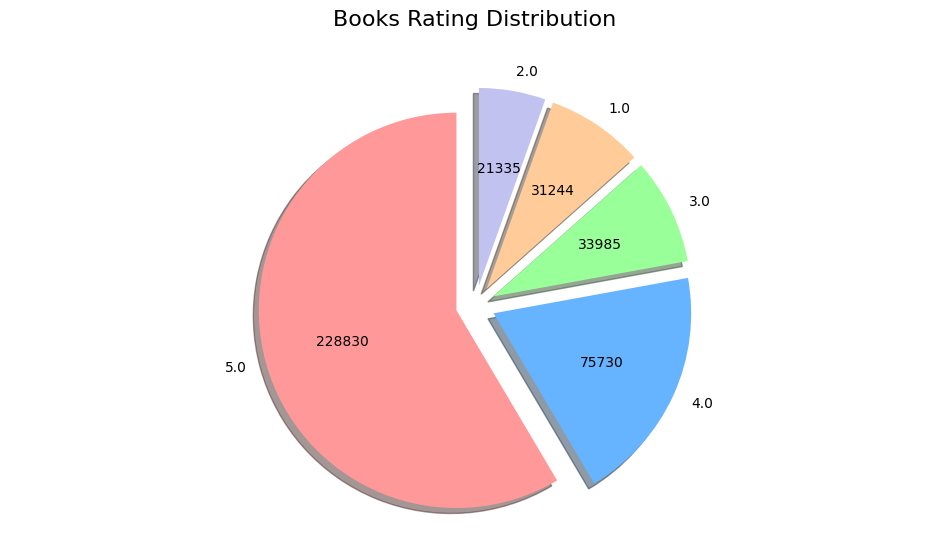

In [ ]:
#Plot of ratings on a scale of 1 to 5
import matplotlib.pyplot as plt

rating_counts = all_users_rating_df['star_rating'].value_counts()
labels = rating_counts.index.tolist()
counts = rating_counts.values.tolist()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

# Explode all slices
explode = [0.1] * len(counts)

plt.figure(figsize=(12, 6))
plt.pie(counts,
        labels=labels,
        colors=colors,
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100),
        startangle=90,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 10})

plt.title('Books Rating Distribution', fontsize=16, pad=30)
plt.axis('equal')
plt.show()

In [ ]:
# Most Rating Customers
customers_with_most_ratings = all_users_rating_df.groupby('customer_id').size().sort_values(ascending=False)[:10]
customers_with_most_ratings

,0
customer_id,
50122160,2858
50732546,1600
50776149,1233
20595117,940
35985708,584
38491967,509
45041039,495
39569598,445
12598621,422


In [ ]:
#Most Rated Books by user

most_rated_books = all_users_rating_df[['product_id','product_title']].groupby(['product_id', 'product_title']).size().sort_values(ascending=False)[:10]
most_rated_books = most_rated_books.reset_index(name='count')  # Reset index for better display
print(most_rated_books)

   product_id                                      product_title  count
0  0439784549    Harry Potter and the Half-Blood Prince (Book 6)   2052
1  0975599518  Natural Cures "They" Don't Want You to Know about    917
2  0060875410                                   The FairTax Book    765
3  0060761288  100 People Who Are Screwing Up America (And Al...    633
4  0316011770                                      The Historian    589
5  1594480001                                    The Kite Runner    504
6  006073132X  Freakonomics: A Rogue Economist Explores the H...    481
7  037582670X                       Eldest (Inheritance, Book 2)    357
8  0066214130                                      State of Fear    356
9  1595230068  The Truth About Hillary: What She Knew, When S...    350


In [ ]:
#Top 10 books with most number of ratings and it's average rating.

# Group by product_id and calculate the number of ratings and average rating
book_ratings = all_users_rating_df.groupby(['product_id', 'product_title']).agg({'star_rating': ['mean', 'count']})

# Flatten the column names
book_ratings.columns = ['average_rating', 'rating_count']

# Sort by rating count in descending order and get the top 10
top_rated_books = book_ratings.sort_values('rating_count', ascending=False)

top_rated_books.head(10)

,,average_rating,rating_count
product_id,product_title,,
0439784549,Harry Potter and the Half-Blood Prince (Book 6),4.239766,2052
0975599518,"Natural Cures ""They"" Don't Want You to Know about",2.876772,917
0060875410,The FairTax Book,3.163399,765
0060761288,100 People Who Are Screwing Up America (And Al Franken Is #37),3.088468,633
0316011770,The Historian,3.261460,589
1594480001,The Kite Runner,4.488095,504
006073132X,Freakonomics: A Rogue Economist Explores the Hidden Side of Everything,3.790021,481
037582670X,"Eldest (Inheritance, Book 2)",3.358543,357
0066214130,State of Fear,3.292135,356


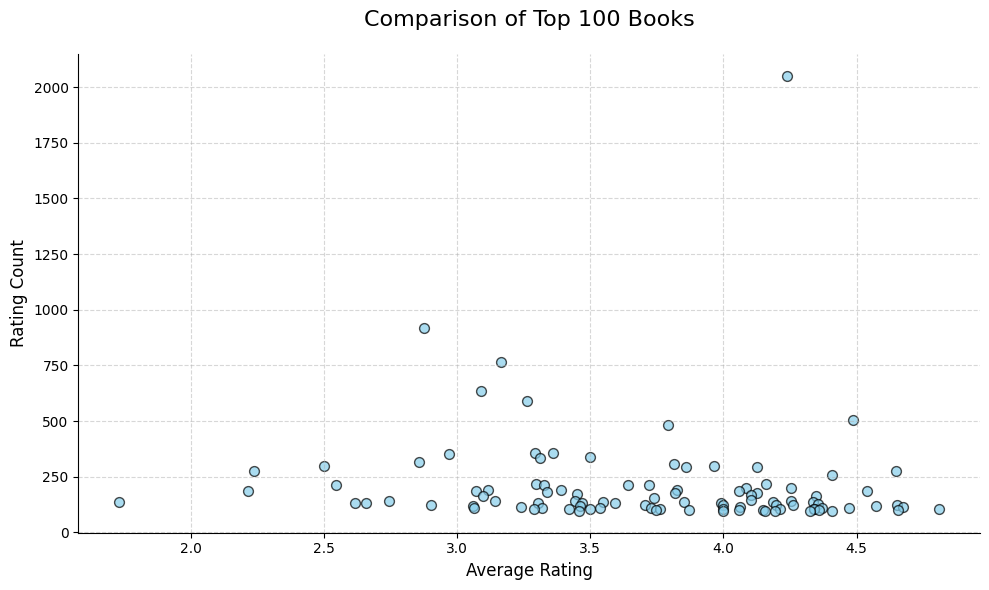

In [ ]:
#average_rating vs rating_count

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(top_rated_books.head(100)['average_rating'],
            top_rated_books.head(100)['rating_count'],
            s=50,
            alpha=0.7,
            color='skyblue',
            edgecolors='black')

plt.title('Comparison of Top 100 Books', fontsize=16, pad=20)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Rating Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

-----EDA ends here-----

In [ ]:
# Calculate the number of customers with a rating count of 1
customer_rating_counts = all_users_rating_df.groupby('customer_id')['star_rating'].count()
num_customers_with_one_rating = (customer_rating_counts == 1).sum()
num_customers_with_two_rating = (customer_rating_counts == 2).sum()
num_customers_with_three_rating = (customer_rating_counts == 3).sum()
num_customers_with_four_rating = (customer_rating_counts == 4).sum()
num_customers_with_five_rating = (customer_rating_counts == 5).sum()
num_customers_with_greater_than_5_less_than_10 = ((customer_rating_counts < 10) & (customer_rating_counts > 5)).sum()
num_customers_with_greater_than_10_less_than_20 = ((customer_rating_counts < 20) & (customer_rating_counts > 10)).sum()
num_customers_with_greater_than_20_less_than_50 = ((customer_rating_counts < 50) & (customer_rating_counts > 20)).sum()

num_customers_with_greater_than_equal_five_rating = (customer_rating_counts >= 5).sum()


print(f"Number of customers with a rating count of 1: {num_customers_with_one_rating}")
print(f"Number of customers with a rating count of 2: {num_customers_with_two_rating}")
print(f"Number of customers with a rating count of 3: {num_customers_with_three_rating}")
print(f"Number of customers with a rating count of 4: {num_customers_with_four_rating}")
print(f"Number of customers with a rating count less than 5: {num_customers_with_five_rating}")
print(f"Number of customers with a rating count greater than 5 and less than 10: {num_customers_with_greater_than_5_less_than_10}")
print(f"Number of customers with a rating count greater than 10 and less than 20: {num_customers_with_greater_than_10_less_than_20}")
print(f"Number of customers with a rating count greater than 20 and less than 50: {num_customers_with_greater_than_20_less_than_50}")

print(f"Number of customers with a rating count greater than and equal 5: {num_customers_with_greater_than_equal_five_rating}")

Number of customers with a rating count of 1: 181541
Number of customers with a rating count of 2: 23000
Number of customers with a rating count of 3: 7681
Number of customers with a rating count of 4: 3374
Number of customers with a rating count less than 5: 1915
Number of customers with a rating count greater than 5 and less than 10: 3136
Number of customers with a rating count greater than 10 and less than 20: 1586
Number of customers with a rating count greater than 20 and less than 50: 870
Number of customers with a rating count greater than and equal 5: 8288


In [ ]:
# prompt: create an df with all the customers having rating count >= 5

# Group by customer_id and count the number of ratings for each customer
customer_rating_counts = all_users_rating_df.groupby('customer_id')['star_rating'].count()

# Filter the customer_rating_counts to include only customers with 5 or more ratings
customers_with_at_least_5_ratings = customer_rating_counts[customer_rating_counts >= 5].index

# Create a new DataFrame containing only the rows where the customer_id is in the customers_with_at_least_5_ratings list
df_filtered = all_users_rating_df[all_users_rating_df['customer_id'].isin(customers_with_at_least_5_ratings)]

df_filtered

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
6,US,53000124,R1KJ6MB7MRSQFF,0805076069,145341889,Bait and Switch: The (Futile) Pursuit of the A...,Books,4.0,9.0,11.0,N,N,I viewed this the opposite of Publisher's Week...,"This book is chilling and depressing indeed, t...",2005-10-14
12,US,27925116,R7M06Z88PD7SX,0029148510,72387289,Acts of War: Behavior of Men in Battle,Books,4.0,14.0,14.0,N,N,Solid Book About Facing Death and Killing in War,"Whether intentional or not, this book's audien...",2005-10-14
20,US,50732546,R17026W0TBFZGL,045121692X,904844135,"The Last Heiress (Friarsgate Inheritance, Book 4)",Books,5.0,1.0,2.0,N,N,superb historical romance,"During the reign of Henry VIII, at fourteen El...",2005-10-14
32,US,41549714,R2W8C8DO33WTMP,0312853165,929229596,"The Demon Princes, Vol. 2: The Face * The Book...",Books,4.0,6.0,7.0,N,N,Fourth and Fifth Books of the Demon Princes Se...,"\\""The Face\\"", the first book in this volume,...",2005-10-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391177,US,15502263,R1WPPCJYTTJYCJ,1557763704,611207685,Narcotics Anonymous Step Working Guides,Books,5.0,25.0,26.0,N,N,Best recovery book for study available,This a great workbook for those recovering add...,2005-01-12
391182,US,52749866,R65DTP9OFBC1P,0345275950,342043542,Starman Jones,Books,5.0,3.0,3.0,N,N,One of Heinlein's Best,"Starman Jones is one of Heinlein's best, along...",2005-01-12
391186,US,51913070,R3FHB0T5K5NNOC,0886779758,755881554,"The Second Summoning (The Keeper's Chronicles,...",Books,5.0,4.0,4.0,N,N,My favorite of the trilogy,Claire Hanson is a Keeper---basically acting a...,2005-01-12
391187,US,52976711,R2BLHTRJJQMJOJ,0804104549,109006436,Riding the Iron Rooster,Books,5.0,13.0,19.0,N,N,Ha! ha! ha! We're screwed!,"First off, let's just accept that this is a gr...",2005-01-12


In [ ]:
customer_rating_counts_new = df_filtered.groupby('customer_id')['star_rating'].count()
num_customers_with_greater_than_five_rating_new = (customer_rating_counts_new >= 5).sum()
print(f"Number of customers with a rating count greater than 5: {num_customers_with_greater_than_five_rating_new}")

Number of customers with a rating count greater than 5: 8288


In [ ]:
# prompt: create and download this df_filtered

# Assuming df_filtered is already defined in your code

#from google.colab import files

# Convert the DataFrame to CSV format
#csv_data = df_filtered.to_csv(index=False)

#import io # Importing the 'io' module to handle in-memory file-like objects
#from google.colab import files
# Create a file-like object from the CSV data
#file_object = io.StringIO(csv_data)

# Download the file
#files.download('df_filtered.csv')

In [ ]:
# prompt: create new df with unique product id with product title from df_filtered

# Create a new DataFrame with unique product IDs and their titles
df_unique_products = df_filtered[['product_id', 'product_title']].drop_duplicates()

df_unique_products

,product_id,product_title
3,0373836635,Colby Conspiracy (Colby Agency)
6,0805076069,Bait and Switch: The (Futile) Pursuit of the A...
12,0029148510,Acts of War: Behavior of Men in Battle
20,045121692X,"The Last Heiress (Friarsgate Inheritance, Book 4)"
32,0312853165,"The Demon Princes, Vol. 2: The Face * The Book..."
...,...,...
391167,059531337X,Quintessence of Dust: The Mystical Meaning of ...
391177,1557763704,Narcotics Anonymous Step Working Guides
391182,0345275950,Starman Jones
391186,0886779758,"The Second Summoning (The Keeper's Chronicles,..."


In [ ]:
# prompt: create and download csv for df_unique_products
import io
from google.colab import files # Importing the necessary module

# Convert the DataFrame to CSV format and save it to a file
# Saving the dataframe to a csv file first
df_unique_products.to_csv('df_unique_products.csv', index=False)

# Download the file
files.download('df_unique_products.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install wikipedia

import wikipedia
import pandas as pd

def get_book_info(title):
  """Tries to extract author and genre from Wikipedia based on title."""
  try:
    page = wikipedia.page(title, auto_suggest=False)
    summary = wikipedia.summary(title, sentences=2, auto_suggest=False)

    # Extract author using keywords (may need adjustment)
    author_keywords = ["by ", "written by ", "author: "]
    for keyword in author_keywords:
      if keyword in summary:
        author = summary.split(keyword)[1].split(".")[0].strip()
        break
    else:
      author = None

    # Extract genre using keywords (may need adjustment)
    genre_keywords = ["genre: ", "genres: ", "a novel of ", "a story of "]
    for keyword in genre_keywords:
      if keyword in summary:
        genre = summary.split(keyword)[1].split(".")[0].strip()
        break
    else:
      genre = None

    return author, genre
  except wikipedia.exceptions.PageError:
    return None, None
  except Exception as e:
    print(f"Error processing '{title}': {e}")
    return None, None

# Apply the function to your DataFrame
df_unique_products[['author name', 'genre']] = df_unique_products['product_title'].apply(lambda title: pd.Series(get_book_info(title)))

df_unique_products

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=6195f86af33498208c43eb21acd8b862db7f577e04205058ad74ad18964c830c
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Streaming output truncated to the last 5000 lines.
Tales of Wells Fargo season 3, episode 26
The Campbells season 2, episode 22
The Celts series 2, episode 6
The Cheaters series 2, episode 6
The Colbys season 2, episode 14
The Dukes of Hazzard season 3, episode 13
The High Chaparral season 3, episode 11
The Immortal episode 4
The Man from Blackhawk episode 12
The Middle season 2, episode 19
The Outsider episode 2
The Real McCoys season 4, episode 20
The Rebel season 2, episode 9
The Waltons season 7, episode 20
Versailles season 3, episode 10
Whiplash episode 23
Z-Cars series 7, episode 87
The Legacy (TV series)
Le Legs
The Legacy (professional wrestling)
The Legacy (Lindenwood University)
The Legacy: Realm of Terror
Poltergeist: The Legacy
Legacy (disambiguation)
Error processing 'House of Sand and Fog': "House of Sand and Fog" may refer to: 
House of Sand and Fog (novel)
House of Sand and Fog (film)
House of Sand and Fog (soundtrack)
Error processing 'Spanish': "Spanish" may refer to

In [ ]:
# prompt: can you load the `Books_Data_Clean.csv` which is there in this runtime file

import pandas as pd

# Assuming 'Books_Data_Clean.csv' is in the current working directory
books_df = pd.read_csv('Books_Data_Clean.csv')

# Print some info about the DataFrame
books_df.info()

# You can then work with the DataFrame `books_df` further

In [ ]:
books_df.head()

In [ ]:
# prompt: can you download all of the data in the merged_df and download it

# Convert the DataFrame to CSV format
csv_data = merged_df.to_csv(index=False)

# Create a file-like object from the CSV data
file_object = io.StringIO(csv_data)

# Download the file
files.download('merged_df.csv')

NameError: name 'merged_df' is not defined

In [ ]:
# filter all_users_rating_df if it exist in books_df

# Filter the user rating based in book data set based on whether 'product_title' exists in books_entity_df
filtered_books_df = all_users_rating_df[all_users_rating_df['product_title'].isin(books_df['Book Name'])]

# Print the filtered DataFrame
filtered_books_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
172,US,51857973,R1AA0JXK1U70RO,0785263705,407388798,Blue Like Jazz: Nonreligious Thoughts on Chris...,Books,2.0,53.0,65.0,N,N,Wants to be useful. But just isn't.,I thought of several different ways in which t...,2005-10-14
180,US,45152627,R3OFPLCIINZ4DZ,140003065X,366389334,A Fine Balance,Books,3.0,4.0,13.0,N,N,"well-crafted, yet unlyrical and off-putting",I walked away from the book disturbed in many ...,2005-10-14
219,US,53080748,R1A7RF31MUT168,0446532436,967980395,True Believer,Books,2.0,4.0,8.0,N,N,Wait for the Movie!,Not all that good. I was waiting for a revela...,2005-10-14
261,US,24513242,R327Y8FVALBGWW,0785263705,407388798,Blue Like Jazz: Nonreligious Thoughts on Chris...,Books,1.0,46.0,70.0,N,N,Church in crisis? Donald to the rescue!,"Thank goodness! Over 2,000 + years of boring o...",2005-10-14
565,US,12084637,R2WCAPJHENS6MP,0525948023,418107642,A New Earth: Awakening to Your Life's Purpose,Books,5.0,18.0,22.0,N,N,Worthwhile Work and Read,There is a lot in this book that portrays the ...,2005-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105281,US,53096063,R869EPLN1934S,0679419462,861735579,The Lost World,Books,1.0,0.0,2.0,N,N,A sickeningly pathetic rehash of Jurassic Park!,It had some pretty good parts but for the most...,1995-10-18
3105311,US,53096306,R26IQ9QPNMP1M6,0440220602,233513923,The Chamber,Books,5.0,1.0,1.0,N,N,"Excellent, gripping reading.",This story is more about the lawyer representi...,1995-09-21
3105322,US,53096310,R2OTTPXZG93NSH,0671510053,357229344,The Shipping News,Books,5.0,0.0,1.0,N,N,Excellent story - down-to-earth and also spiri...,The author tells an interesting story with rea...,1995-09-07
3105326,US,53096377,R83ZJYM0CHUP0,0385479565,905671096,The Hot Zone: The Terrifying True Story of the...,Books,5.0,0.0,0.0,N,N,"Reads like a great thriller; unbelievably, it'...",A very thorough a well written account of a sh...,1995-08-31


In [ ]:
# prompt: convert filtered_books_df to csv and download it

# from google.colab import files

# # Assuming 'filtered_books_df' is your DataFrame
# filtered_books_df.to_csv('filtered_books.csv', encoding='utf-8', index=False)
# files.download('filtered_books.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Top 10 books with most number of ratings and it's average rating.

# Group by product_id and calculate the number of ratings and average rating
filtered_book_ratings = filtered_books_df.groupby(['product_id', 'product_title']).agg({'star_rating': ['mean', 'count']})

# Flatten the column names
filtered_book_ratings.columns = ['average_rating', 'rating_count']

# Sort by rating count in descending order and get the top 10
filtered_top_rated_books = filtered_book_ratings.sort_values('rating_count', ascending=False)

filtered_top_rated_books.head(10)

,,average_rating,rating_count
product_id,product_title,,
0679444815,Timeline,3.455121,947
0385497466,The Brethren,2.634424,703
0345417623,Timeline,3.732673,606
038550120X,A Painted House,3.803361,595
0066214130,State of Fear,3.287905,587
0440226430,Summer Sisters,4.078505,535
0345350499,The Mists of Avalon,4.429688,512
1576737330,The Prayer of Jabez: Breaking Through to the Blessed Life,3.393443,488
0446532681,America (The Book): A Citizen's Guide to Democracy Inaction,4.484649,456


In [ ]:
# prompt: Can you compare the books_entity_df (key: Book name) with book_df (book name) and try to merge them

# Merge books_entity_df and book_df based on 'Book Name'
merged_user_rating_book_df = pd.merge(books_df, all_users_rating_df, left_on='Book Name', right_on='product_title', how='inner')

# Print the merged DataFrame
merged_user_rating_book_df

NameError: name 'books_df' is not defined

In [ ]:
#download the merged data frame as csv

from google.colab import files

# Assuming 'merged_user_rating_book_df' is your DataFrame
merged_user_rating_book_df.to_csv('merged_user_rating_book.csv', encoding='utf-8', index=False)

NameError: name 'merged_user_rating_book_df' is not defined

In [ ]:
merged_user_rating_book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50692 entries, 0 to 50691
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                50692 non-null  int64  
 1   Publishing Year      50692 non-null  float64
 2   Book Name            50692 non-null  object 
 3   Author               50692 non-null  object 
 4   language_code        45288 non-null  object 
 5   Author_Rating        50692 non-null  object 
 6   Book_average_rating  50692 non-null  float64
 7   Book_ratings_count   50692 non-null  int64  
 8   genre                50692 non-null  object 
 9   gross sales          50692 non-null  float64
 10  publisher revenue    50692 non-null  float64
 11  sale price           50692 non-null  float64
 12  sales rank           50692 non-null  int64  
 13  Publisher            50692 non-null  object 
 14  units sold           50692 non-null  int64  
 15  marketplace          50692 non-null 

In [ ]:
# prompt: value count based on customer_id and there rating count in merged_user_rating_book_df, sort by rating count

# Calculate value counts of ratings for each customer
rating_counts_by_customer = merged_user_rating_book_df.groupby('customer_id')['star_rating'].count().sort_values(ascending=False)

# Print the result
rating_counts_by_customer

,star_rating
customer_id,
50732546,50
52615377,35
52938698,35
39792599,30
41006954,25
...,...
49226634,1
27824010,1
49226426,1


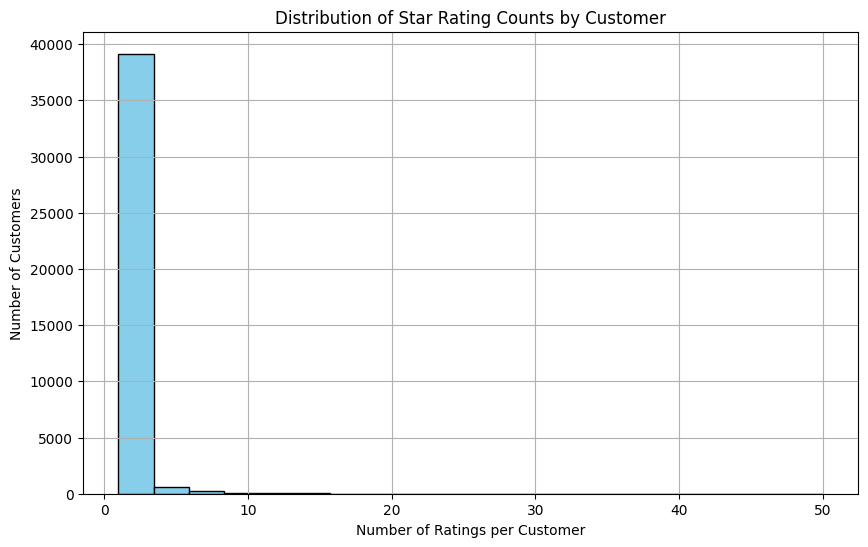

Minimum number of ratings per customer: 1
Maximum number of ratings per customer: 50
Average number of ratings per customer: 1.26


In [ ]:
# prompt: range of value for start_rating count by customer_id, show the distribution too

import matplotlib.pyplot as plt

# Calculate the range of star_rating counts for each customer_id
customer_rating_counts = merged_user_rating_book_df.groupby('customer_id')['star_rating'].count()

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(customer_rating_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Star Rating Counts by Customer')
plt.grid(True)
plt.show()

# Show the range of values
print(f"Minimum number of ratings per customer: {customer_rating_counts.min()}")
print(f"Maximum number of ratings per customer: {customer_rating_counts.max()}")
print(f"Average number of ratings per customer: {customer_rating_counts.mean():.2f}")

In [ ]:
# prompt: number of customer with rating count as 1

# Calculate the number of customers with a rating count of 1
customer_rating_counts = merged_user_rating_book_df.groupby('customer_id')['star_rating'].count()
num_customers_with_one_rating = (customer_rating_counts == 1).sum()
num_customers_with_less_than_5 = (customer_rating_counts <= 5).sum()
num_customers_with_greater_than_5_less_than_10 = ((customer_rating_counts < 10) & (customer_rating_counts > 5)).sum()
num_customers_with_greater_than_10_less_than_20 = ((customer_rating_counts < 20) & (customer_rating_counts > 10)).sum()
num_customers_with_greater_than_20_less_than_50 = ((customer_rating_counts < 50) & (customer_rating_counts > 20)).sum()


print(f"Number of customers with a rating count of 1: {num_customers_with_one_rating}")
print(f"Number of customers with a rating count less than 5: {num_customers_with_less_than_5}")
print(f"Number of customers with a rating count greater than 5 and less than 10: {num_customers_with_greater_than_5_less_than_10}")
print(f"Number of customers with a rating count greater than 10 and less than 20: {num_customers_with_greater_than_10_less_than_20}")
print(f"Number of customers with a rating count greater than 20 and less than 50: {num_customers_with_greater_than_20_less_than_50}")

Number of customers with a rating count of 1: 34770
Number of customers with a rating count less than 5: 39706
Number of customers with a rating count greater than 5 and less than 10: 281
Number of customers with a rating count greater than 10 and less than 20: 86
Number of customers with a rating count greater than 20 and less than 50: 12


In [ ]:
#Top 10 books with most number of ratings and it's average rating.

# Group by product_id and calculate the number of ratings and average rating
merged_book_ratings = merged_user_rating_book_df.groupby(['product_id', 'product_title', 'genre']).agg({'star_rating': ['mean', 'count']})

# Flatten the column names
merged_book_ratings.columns = ['average_rating', 'rating_count']

# Sort by rating count in descending order and get the top 10
merged_top_rated_books = merged_book_ratings.sort_values('rating_count', ascending=False)

merged_top_rated_books

In [ ]:
# prompt: #Top 10 books with most number of ratings, it's average rating and genre in merged_df

#Top 10 books with most number of ratings, it's average rating and genre in merged_df

# Group by product_id and calculate the number of ratings and average rating
top_10_books = merged_df.groupby(['product_id', 'product_title', 'genre'])['star_rating'].agg(['mean', 'count']).sort_values([('count')], ascending=False).head(10)

# Flatten the column names
top_10_books.columns = ['average_rating', 'rating_count']

# Display the result
top_10_books

,,,average_rating,rating_count
product_id,product_title,genre,,
0679444815,Timeline,genre fiction,3.455121,947
0385497466,The Brethren,fiction,2.634424,703
0345417623,Timeline,genre fiction,3.732673,606
038550120X,A Painted House,nonfiction,3.803361,595
0066214130,State of Fear,genre fiction,3.287905,587
0440226430,Summer Sisters,genre fiction,4.078505,535
0345350499,The Mists of Avalon,genre fiction,4.429688,512
1576737330,The Prayer of Jabez: Breaking Through to the Blessed Life,nonfiction,3.393443,488
0446532681,America (The Book): A Citizen's Guide to Democracy Inaction,nonfiction,4.484649,456


In [ ]:
# prompt: #Top 10 books with most highest average rating and also show genre from merged_df

# Top 10 books with the highest average rating, rating count, and genre from merged_df

# Group by product_id, product_title, and genre, then calculate the average rating and rating count
top_10_books = merged_df.groupby(['product_id', 'product_title', 'genre'])['star_rating'].agg(['mean', 'count']) \
                       .sort_values([('mean')], ascending=False).head(10)

# Flatten the column names
top_10_books.columns = ['average_rating', 'rating_count']

# Display the result
top_10_books

,,,average_rating,rating_count
product_id,product_title,genre,,
0449139239,Prey,genre fiction,5.0,7
0394570804,Sphere,genre fiction,5.0,1
039454689X,The Accidental Tourist,genre fiction,5.0,1
0394552660,Voyager,genre fiction,5.0,1
1572700564,Madame Bovary,genre fiction,5.0,1
157197153X,The Heir,genre fiction,5.0,1
0394558669,The Accidental Tourist,genre fiction,5.0,1
0884118622,The Martian Chronicles,genre fiction,5.0,1
0394573439,The Remains of the Day,nonfiction,5.0,2
